## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
soccer=pd.read_csv('soccer.csv')
soccer

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [43]:
top20 = soccer.groupby('home_team', as_index=False)['home_score'].agg(['sum','count','mean']).sort_values(by = 'sum',ascending=False).head(20)

In [48]:
top20['country'] = top20.index

In [51]:
top20.head()

,sum,count,mean,country
home_team,,,,
Brazil,1403,568,2.470070,Brazil
Germany,1246,506,2.462451,Germany
Argentina,1206,548,2.200730,Argentina
England,1149,498,2.307229,England
Sweden,1134,486,2.333333,Sweden


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

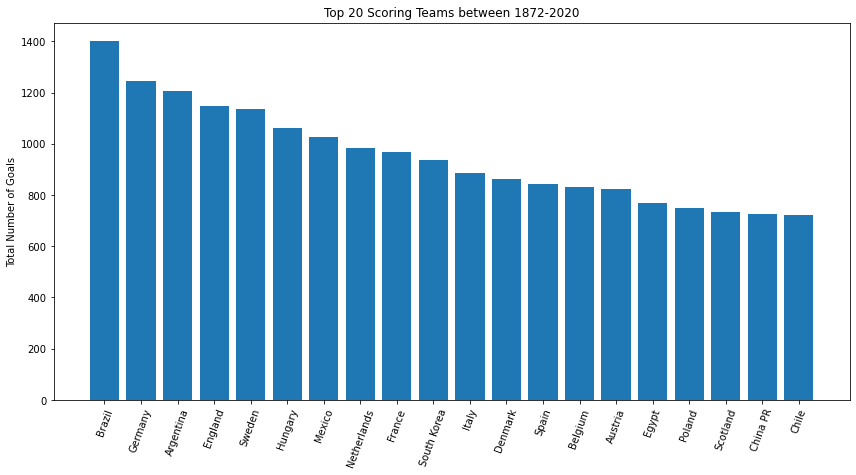

In [71]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=top20['country'], height = top20['sum'])
ax.set_title('Top 20 Scoring Teams between 1872-2020')
ax.set_ylabel('Total Number of Goals')
plt.tight_layout()
plt.xticks(rotation=70)


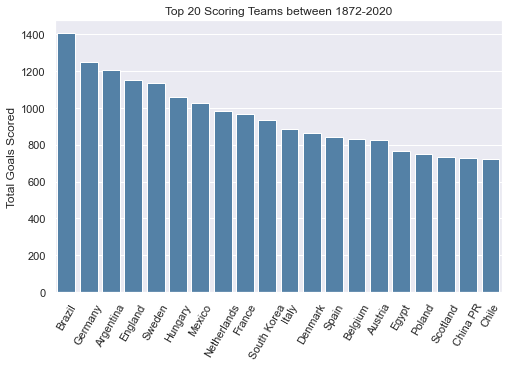

In [80]:
sns.set(rc={"figure.figsize":(8, 5)})
t = sns.barplot(x='country', y='sum', color='steelblue', data=top20)
t.set_xticklabels(labels = top20['country'], rotation=60)
t.set(title = 'Top 20 Scoring Teams between 1872-2020',
      ylabel = 'Total Goals Scored',
      xlabel = None)

plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [107]:
tourn = soccer.groupby('tournament', as_index=False).count().sort_values(by = 'date',ascending=False).head(20)
tourn = tourn[(tourn.tournament != 'Friendly') & (tourn.tournament != 'FIFA World Cup qualification') 
              & (tourn.tournament != 'UEFA Euro qualification') & (tourn.tournament != 'African Cup of Nations qualification')]
tourn.head()

,tournament,date,home_team,away_team,home_score,away_score,city,country,neutral
54,FIFA World Cup,900,900,900,900,900,900,900,900
30,Copa América,813,813,813,813,813,813,813,813
2,AFC Asian Cup qualification,724,724,724,724,724,724,724,724
7,African Cup of Nations,690,690,690,690,690,690,690,690
19,CECAFA Cup,620,620,620,620,620,620,620,620


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

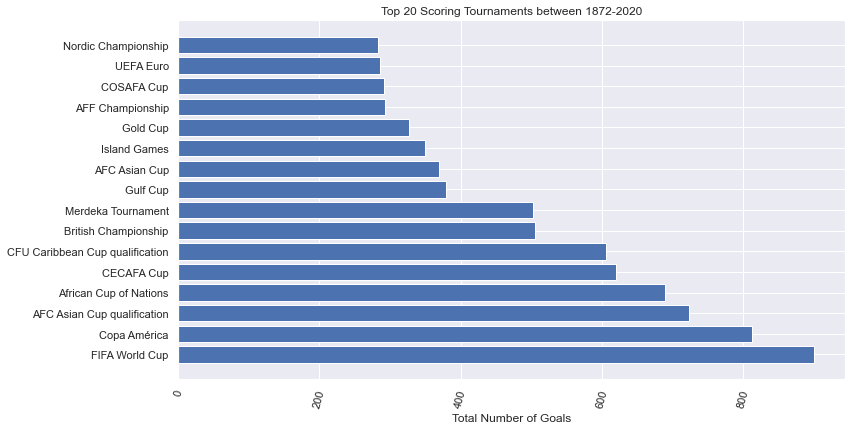

In [207]:
fig, ax = plt.subplots(figsize=(12,6))

ax.barh(y=tourn['tournament'], width = tourn['date'])
ax.set_title('Top 20 Scoring Tournaments between 1872-2020')
ax.set_xlabel('Total Number of Goals')
plt.tight_layout()
plt.xticks(rotation=75)

## Task 
Show the trend in number of matches per year.

In [125]:
soccer['date'] = pd.to_datetime(soccer['date'])
soccer['year']=soccer['date'].dt.year
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [147]:
year = soccer.groupby('year', as_index=False).count().sort_values(by = 'year')
year = year[year['year'] != 2020]
year.tail()

,year,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
143,2015,1003,1003,1003,1003,1003,1003,1003,1003,1003
144,2016,926,926,926,926,926,926,926,926,926
145,2017,958,958,958,958,958,958,958,958,958
146,2018,905,905,905,905,905,905,905,905,905
147,2019,1155,1155,1155,1155,1155,1155,1155,1155,1155


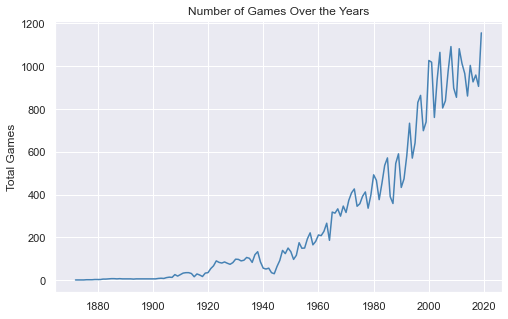

In [162]:
sns.set(rc={"figure.figsize":(8, 5)})
y = sns.lineplot(x='year', y='date', color='steelblue', data=year)
y.set(title = 'Number of Games Over the Years',
      ylabel = 'Total Games',
      xlabel = None)
plt.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [175]:
import numpy as np
conditions = [
    (soccer['home_score'] > soccer['away_score']),
    (soccer['home_score'] < soccer['away_score']),
    (soccer['home_score'] == soccer['away_score'])]

values = ['win','loss','tie']
soccer['home_result'] = np.select(conditions, values)
soccer.head()
#compare.groupby('home_team', as_index=False).count()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win


In [188]:
compare = soccer.groupby(['home_team', 'home_result'], as_index=False).count()
win = compare[(compare.home_result != 'loss') & (compare.home_result != 'tie')]
top_win = win.sort_values(by = 'date',ascending=False).head(20)

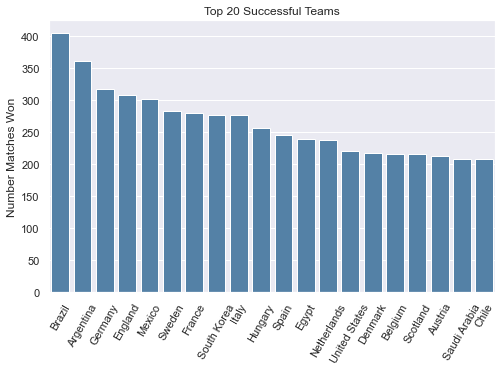

In [189]:
sns.set(rc={"figure.figsize":(8, 5)})
w = sns.barplot(x='home_team', y='date', color='steelblue', data=top_win)
w.set_xticklabels(labels = top_win['home_team'], rotation=60)
w.set(title = 'Top 20 Successful Teams',
      ylabel = 'Number Matches Won',
      xlabel = None)

plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [194]:
win = compare[(compare.home_result != 'loss') & (compare.home_result != 'tie')]
low_win = win.sort_values(by = 'date',ascending=True).head(20)
low_win.head()

,home_team,home_result,date,away_team,home_score,away_score,tournament,city,country,neutral
764,Timor-Leste,win,1,1,1,1,1,1,1,1
619,Republic of St. Pauli,win,1,1,1,1,1,1,1,1
613,Raetia,win,1,1,1,1,1,1,1,1
150,Central Spain,win,1,1,1,1,1,1,1,1
95,Bonaire,win,1,1,1,1,1,1,1,1


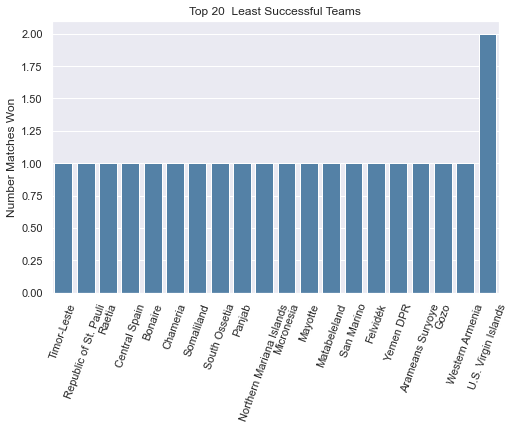

In [195]:
sns.set(rc={"figure.figsize":(8, 5)})
w = sns.barplot(x='home_team', y='date', color='steelblue', data=low_win)
w.set_xticklabels(labels = low_win['home_team'], rotation=70)
w.set(title = 'Top 20  Least Successful Teams',
      ylabel = 'Number Matches Won',
      xlabel = None)

plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [159]:
soccer['month']=soccer['date'].dt.month
month = soccer.groupby('month', as_index=False).count().sort_values(by = 'month')
month.head()

,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218
1,2,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564
2,3,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039
3,4,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538
4,5,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231


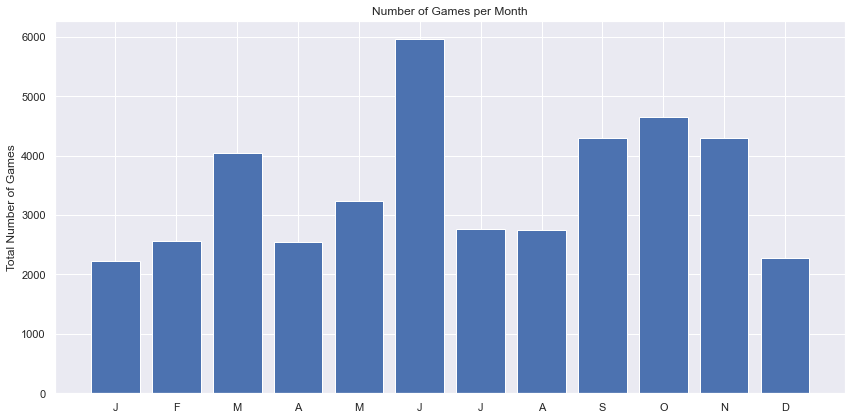

In [157]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=month['month'], height = month['date'])
ax.set_title('Number of Games per Month')
ax.set_ylabel('Total Number of Games')
labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
plt.xticks(month['month'], labels)
plt.tight_layout()

## Task
Which teams played against each other the most?

In [262]:
from collections import Counter

teams=[] #create teams


for i in range(soccer.shape[0]):
    two_teams = [soccer.loc[i, 'home_team'], soccer.loc[i, 'away_team']] #pull teams
    two_teams.sort()
    teams.append(tuple(two_teams)) #create tuple and add to list

common_teams=Counter(teams).most_common(20) #count unique values
common_teams= [(' x '.join(a), b) for a,b in common_teams] #join into string


In [263]:
#create datafram
df = pd.DataFrame(common_teams, columns=['teams', 'matches'])
df.index = df.teams
df.drop('teams', axis = 1, inplace=True)
df.reset_index(inplace=True)

In [264]:
df.head()

,teams,matches
0,Argentina x Uruguay,176
1,Austria x Hungary,133
2,Belgium x Netherlands,125
3,England x Scotland,116
4,Norway x Sweden,107


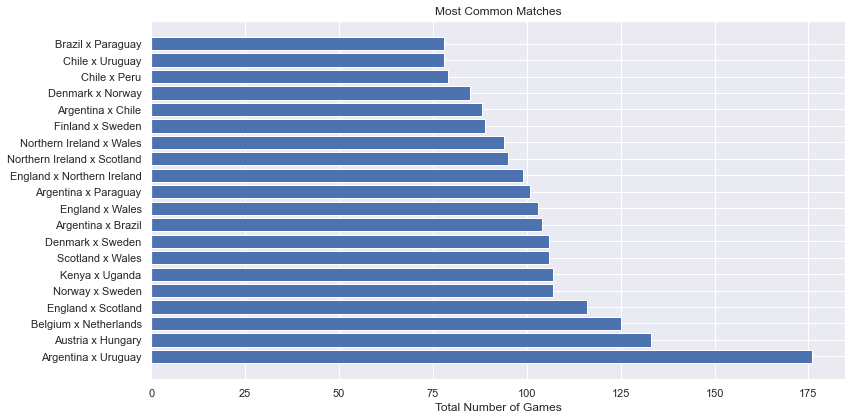

In [265]:
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(y=df['teams'], width = df['matches'])
ax.set_title('Most Common Matches')
ax.set_xlabel('Total Number of Games')
plt.tight_layout()

In [248]:
play = soccer.groupby(['home_team', 'away_team'])['home_score'].count().sort_values(ascending = False)
play.head(20)

home_team    away_team       
Argentina    Uruguay             96
Uruguay      Argentina           80
Austria      Hungary             68
Kenya        Uganda              65
Hungary      Austria             65
Belgium      Netherlands         63
Netherlands  Belgium             62
Argentina    Paraguay            62
Brazil       Paraguay            58
Scotland     England             58
England      Scotland            58
Argentina    Brazil              58
Norway       Sweden              56
Wales        Scotland            54
Sweden       Denmark             54
England      Wales               53
Scotland     Northern Ireland    52
             Wales               52
Denmark      Sweden              52
Argentina    Chile               51
Name: home_score, dtype: int64

In [251]:
play = soccer.groupby(['home_team','away_team']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['home_team','away_team'])
play.head()

,home_team,away_team,count
0,Argentina,Uruguay,96
1,Uruguay,Argentina,80
2,Austria,Hungary,68
3,Kenya,Uganda,65
4,Hungary,Austria,65


## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.